# IMDB explorer
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following [link](http://ai.stanford.edu/~amaas/data/sentiment/)

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from data import imdb

data = imdb()
train_ds, test_ds = data["train"], data["test"]

## Dataset general information

In [3]:
TRAIN_LENGTH, TEST_LENGTH = len(train_ds), len(test_ds)
print(f"""
      Train size: {TRAIN_LENGTH}
      Test size: {TEST_LENGTH}""")


      Train size: 25000
      Test size: 25000


In [4]:
DF = train_ds.data.to_pandas()
DF.describe()

,label
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [6]:
# list label
DF['label'].unique()

array([0, 1], dtype=int64)

<Axes: ylabel='label'>

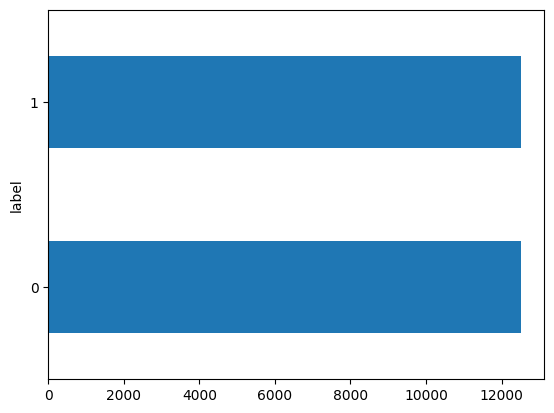

In [7]:
DF['label'].value_counts().plot.barh()

<Axes: ylabel='text'>

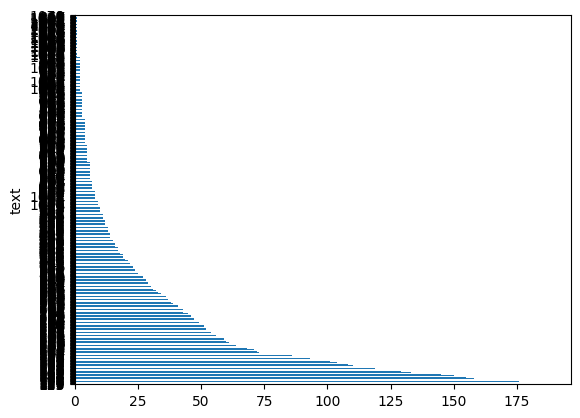

In [8]:
text_length = DF['text'].map(lambda x: len(x.split()))
text_length.value_counts().plot.barh()

In [9]:
print(text_length[text_length <= 284].count())
print(text_length[text_length > 284].count())

18753
6247


In [10]:
text_length.describe()

count    25000.000000
mean       233.787200
std        173.733032
min         10.000000
25%        127.000000
50%        174.000000
75%        284.000000
max       2470.000000
Name: text, dtype: float64

## Print samples sentences

In [11]:
import torch
def random_sample(dataset, size=10):
    indices = torch.randint(0, len(dataset), size=(size, )).numpy()
    subset = dataset[indices]
    for text, label in zip(*subset.values()):
        print(f"Text: {text}\nLabel: {label}")

In [12]:
random_sample(train_ds)

Text: What can I say about it?It's another Hollywood's horror flick with very high budget(80 million dollars).Not scary at all,it offers us only a few thrills and one really creepy sequence with skeleton in the fireplace.A lot of computer generated special effects and nothing more.Catherine Zeta-Jones is beautiful as always,Lili Taylor is also a good actress.The architecture of the Hill House is amazing,all these monuments,statues,furniture...Delicious!However I don't like the ending because it was so luscious.Check this one out and form your own opinion on it.I give this picture 7 out of 10.
Label: 1
Text: Every now and then a film maker brings to life a unique group of people and lets you inside to see the things that make us human. Lawrence Kasden done this again. I always felt theBg Cill was the anthem of it's age and he has managed to do it again in Grand Canyon. Every so often we find ourselves at a point where we have the opportunity to choose life and so often we blow it. This 

In [13]:
random_sample(train_ds)

Text: With a story and screenplay that seems to have been written by a high schooler, 'The Art of Seduction' fails to deliver the romantic, sophisticated experience it tries to bill itself as. The two main characters have the potential to be interesting - both male and female lead are "swinging singles (or in the female lead's case, engaged)", but 'The Art of Seduction' doesn't even try. Shirking from a frank examination of these two characters' personalities, 'The Art of Seduction' eschews anything of substance for a basis of thin, lean stereotype. <br /><br />'The Art of Seduction' is insulting - insulting to its characters, insulting to men and women, and insulting to its audiences' expectations. It takes the awful beautiful people we all know and plays out their painful interactions while expecting us to idolize them. Ji-wan is an immature, spoiled, manipulative bitch. The viewer is expected to like and forgive her flaws because she's pretty. Min-jun, well, he's exactly the same. N

In [14]:
random_sample(train_ds)

Text: This is a very sad movie. Really. Nothing happens in this movie. The Script is bad!!! I guess they've just copy-paste the first 15 pages to 90 pages. The Producers must have thought let's create a Hollywood movie here in Belgium. They didn't succeed. Now in the third week it is only running in Antwerp and Brussels at 22h45 or something. In the past we have had really good movies in Belgium, like Daens. Shades is a waste of your time. Maybe you could sneak in the theater after you've seen a real movie. If you've seen 10 minutes of Shades, you've seen it all. It was advertised to death on local radio and TV. I hope it will disappear in the Shades soon.
Label: 0
Text: If you want to checkout a good Jason Scott Lee film, I recommend the following:<br /><br />Dragon: The Bruce Lee Story<br /><br />Rapa Nui<br /><br />"Timecop 2: The Berlin Decision" is an awful film. Awful production values. Awful acting. Awful script. I would not recommend this film to be watched by anyone who seriou

## Text processing

In [15]:
from data import IMBDWrapped, simple_preprocess, lemma, imdb, remove_stopwords
train, test= imdb()['train'], imdb()['test']
wrapped_dataset = IMBDWrapped(
    dataset= train,
    text_processors=[
        simple_preprocess,
        # lemma,
        # remove_stopwords
    ]
)

In [16]:
# print the sample of process text
wrapped_dataset[:60]

(['i rented i am curious yellow from my video store because of all the controversy that surrounded it when it was first released in 1967 i also heard that at first it was seized by us customs if it ever tried to enter this country therefore being a fan of films considered controversial i really had to see this for myself the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states in between asking politicians and ordinary denizens of stockholm about their opinions on politics she has sex with her drama teacher classmates and married men what kills me about i am curious yellow is that 40 years ago this was considered pornographic really the sex and nudity scenes are few and far between even then it s not shot like some cheap